### Importamos drive y Cargamos Imagenes

In [3]:
from PIL import Image
import os
import numpy as np

# Función para obtener las etiquetas



def get_label(filename):


    if 'Pikachu' in filename:
        return [1, 0, 0, 0, 0]  # Pikachu
    elif 'Charmander' in filename:
        return [0, 1, 0, 0, 0]  # Charmander
    elif 'Diglett' in filename:
        return [0, 0, 1, 0, 0]  # Diglett
    elif 'Squirtle' in filename:
        return [0, 0, 0, 1, 0]  # Squirtle
    elif 'Mew' in filename:
        return [0, 0, 0, 0, 1]  # Mew

# Función para cargar las imágenes
def load_images(folder_path):
    image_list = []
    y_labels = []
    for filename in os.listdir(folder_path):
          if filename.endswith(".jpg") or filename.endswith(".png"):
              img_path = os.path.join(folder_path, filename)
              img = Image.open(img_path)
              img = img.resize((224, 224))  # Redimensiona la iamgen
              img_array = np.array(img) / 255.0  # Normalizar los valores de píxeles
              if img_array.shape == (224, 224, 3):  # Comprobamos  si la forma es la esperada
                  image_list.append(img_array)
                  y_labels.append(get_label(filename))
              else:
                  print(f"Ignorando {filename} debido a forma incompatible: {img_array.shape}")
    return image_list, y_labels

# Ruta a la carpeta que contiene las imágenes para train y test
train_folder_path = 'C:/Users/palbo/Documents/INACAP/Semestre8/machine learning/unidad 4/Pokemon/train'
test_folder_path = 'C:/Users/palbo/Documents/INACAP/Semestre8/machine learning/unidad 4/Pokemon/test'

# Cargar imágenes de entrenamiento y test
image_list_train, y_train = load_images(train_folder_path)

image_list_test, y_test = load_images(test_folder_path)




FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: '/Pokemon/train'

In [ ]:
len(image_list_train)
len(y_train) 

349

###KERAS

Epoch 1/15
22/22 [==============================] - 62s 3s/step - loss: 1.6552 - accuracy: 0.2923 - val_loss: 1.2909 - val_accuracy: 0.4953
Epoch 2/15
22/22 [==============================] - 55s 3s/step - loss: 1.1939 - accuracy: 0.5043 - val_loss: 1.0270 - val_accuracy: 0.5888
Epoch 3/15
22/22 [==============================] - 57s 3s/step - loss: 0.9306 - accuracy: 0.6590 - val_loss: 0.9150 - val_accuracy: 0.6636
Epoch 4/15
22/22 [==============================] - 56s 3s/step - loss: 0.6758 - accuracy: 0.7650 - val_loss: 0.8175 - val_accuracy: 0.6916
Epoch 5/15
22/22 [==============================] - 55s 2s/step - loss: 0.4893 - accuracy: 0.8252 - val_loss: 0.9316 - val_accuracy: 0.6916
Epoch 6/15
22/22 [==============================] - 57s 3s/step - loss: 0.3467 - accuracy: 0.8997 - val_loss: 0.6524 - val_accuracy: 0.7944
Epoch 7/15
22/22 [==============================] - 66s 3s/step - loss: 0.2757 - accuracy: 0.8997 - val_loss: 0.6368 - val_accuracy: 0.7850
Epoch 8/15
22/22 [==

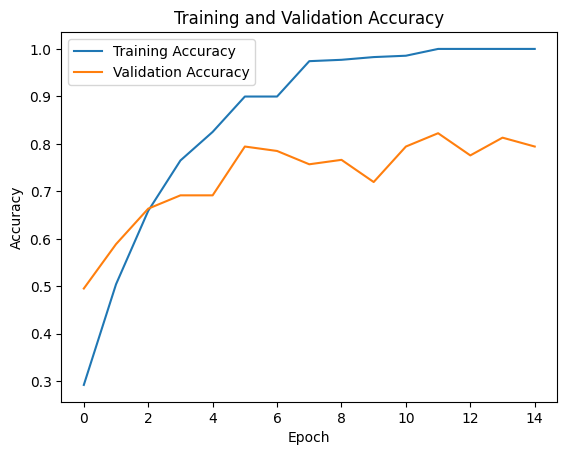

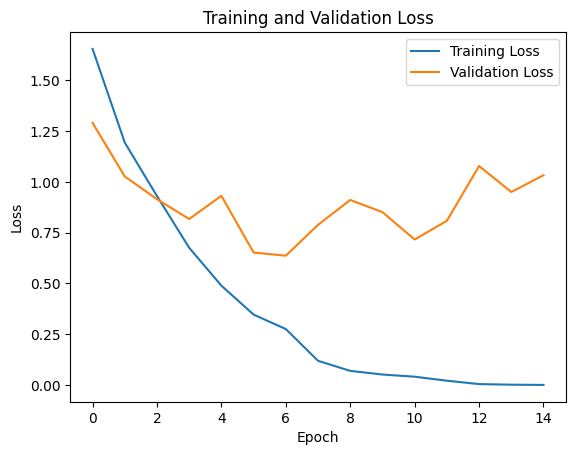

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import datasets, layers, models
import matplotlib.pyplot as plt

# Se establece una semilla para evitar distintos resultados
keras.utils.set_random_seed(812)

# Se establece un modelo neuronal
model = Sequential()
tam_kernel1 = (3,3)
model.add(layers.Conv2D(50, tam_kernel1, activation='relu', input_shape=(224, 224, 3)))
tam_pooling1 = (2,2)
model.add(layers.MaxPooling2D(tam_pooling1))
model.add(layers.Dropout(0.02))
tam_kernel2 = (3,3)
model.add(layers.Conv2D(64, tam_kernel2, activation='relu'))
tam_pooling2 = (2,2)
model.add(layers.MaxPooling2D(tam_pooling2))
model.add(layers.Dropout(0.03))
tam_kernel3 = (3,3)
model.add(layers.Conv2D(64, tam_kernel3, activation='relu'))
tam_pooling3 = (2,2)
model.add(layers.MaxPooling2D(tam_pooling3))
# tam_kernel4 = (3,3)

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5,activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




# Convertir los datos a arrays numpy si no se han convertido aún
image_list_train = np.array(image_list_train)
y_train = np.array(y_train)

#Cambiamos el formato al conjunto de prueba
image_list_test = np.array(image_list_test)
y_test = np.array(y_test);

# Ajustar("Entrenar") el modelo al conjunto de datos
history = model.fit(image_list_train, y_train, epochs=15, batch_size=16, validation_data=(image_list_test, y_test))


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar la precisión
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import tf2onnx
import onnx
import tensorflow as tf

# Definir una función de envoltura
def wrap_model(model):
    @tf.function(input_signature=[tf.TensorSpec([None, 224, 224, 3], tf.float32)])
    def wrapped_model(inputs):
        return model(inputs)
    return wrapped_model

# Envolver el modelo
wrapped_model = wrap_model(model)

# Convertir el modelo a ONNX
model_proto, _ = tf2onnx.convert.from_function(
    wrapped_model,
    input_signature=[tf.TensorSpec([None, 224, 224, 3], tf.float32)],
    opset=13
)

# Guardar el modelo ONNX
output_path = "pokemon_model.onnx"
onnx.save(model_proto, output_path)

In [ ]:
#Usamos el modelo para predecir con el conjunto de prueba
y_pred = model.predict(image_list_test) #Esto genera una salida predicha
#Redondeamos los resultados
y_pred=np.round(y_pred)

model.save('C:/Users/palbo/Documents/INACAP/Semestre8/machine learning/unidad 4/Pokemon/pokemon_model.h5') 

4/4 [==============================] - 4s 882ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Se importan las librerias
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Accuracy 
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred,average='micro')

# Recall
recall = recall_score(y_test, y_pred,average='micro')
# F1 Score
f1 = f1_score(y_test, y_pred,average='micro')
# Imprime los resultados
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.79
Precision: 0.81
Recall: 0.79
F1 Score: 0.80


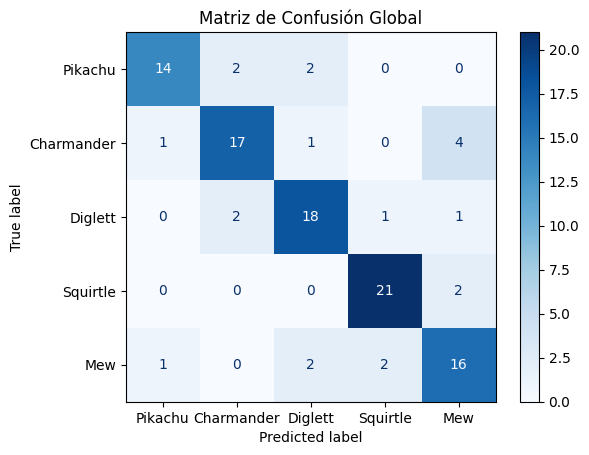

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Calcular la matriz de confusión
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Pikachu', 'Charmander', 'Diglett', 'Squirtle', 'Mew'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión Global')
plt.show()
